In [118]:
import numpy as np

### 3.1.3 Classification of samples that are not linearly separable

In [119]:
n = 100

# label a
mA = [5, 2]
sigma = 0.5
aX1 = np.random.normal(mA[0], sigma, n)
aX2 = np.random.normal(mA[1], sigma, n)
a = np.vstack((aX1, aX2, np.zeros(n)))
a.shape, a[:,:5]

((3, 100),
 array([[5.61750452, 4.10096704, 4.786502  , 5.06278993, 5.57262097],
        [2.1044221 , 2.36461179, 2.23330414, 1.96426988, 2.51291574],
        [0.        , 0.        , 0.        , 0.        , 0.        ]]))

In [120]:
# label b
mB = [10, 5]
bX1 = np.random.normal(mB[0], sigma, n)
bX2 = np.random.normal(mB[1], sigma, n)
b = np.vstack((bX1, bX2, np.ones(n)))
b.shape, b[:,:5]

((3, 100),
 array([[10.48313875,  9.10210432,  8.91426447,  9.53742383, 11.23511367],
        [ 4.9133048 ,  4.47838015,  4.46457782,  4.87769365,  4.79356564],
        [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ]]))

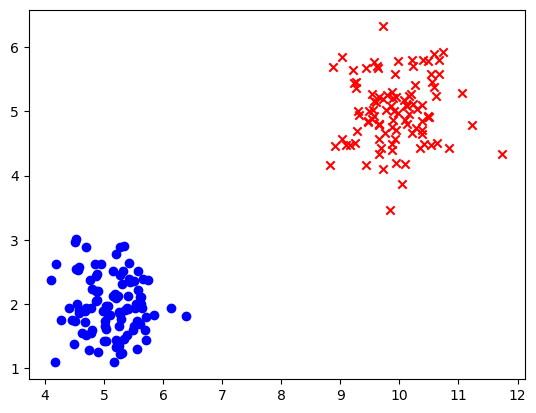

In [121]:
import matplotlib.pyplot as plt
plt.scatter(aX1, aX2, c='b', label='a', marker='o')
plt.scatter(bX1, bX2, c='r', label='b', marker='x')

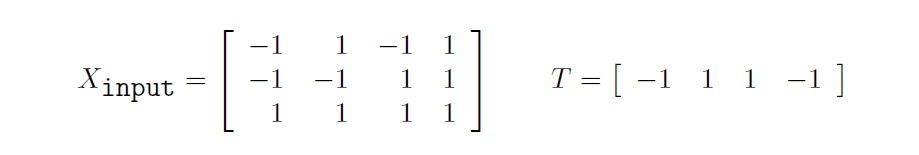

In [122]:
dataset = np.hstack((a,b))
dataset[:,:5], dataset.shape

(array([[5.61750452, 4.10096704, 4.786502  , 5.06278993, 5.57262097],
        [2.1044221 , 2.36461179, 2.23330414, 1.96426988, 2.51291574],
        [0.        , 0.        , 0.        , 0.        , 0.        ]]),
 (3, 200))

In [123]:
dataset

array([[ 5.61750452,  4.10096704,  4.786502  ,  5.06278993,  5.57262097,
         4.86850114,  5.19967808,  5.4201258 ,  4.89682218,  5.51450469,
         4.78543147,  4.75020273,  4.56652678,  4.61658338,  5.24862879,
         5.31496075,  5.14884684,  5.32909709,  5.61921125,  4.5448927 ,
         4.69504334,  4.46147899,  4.85271394,  4.5256916 ,  4.40165025,
         4.67428905,  5.19763495,  5.26154131,  5.1657215 ,  5.32696518,
         5.37761286,  5.24889379,  5.26819164,  4.54796085,  5.22884992,
         4.99620491,  5.02921278,  4.76480928,  5.50151136,  4.77739449,
         4.1634772 ,  4.52138562,  5.39000212,  4.6996248 ,  5.4142747 ,
         4.48194336,  4.50879773,  4.77174617,  4.88630912,  5.69336194,
         4.57173227,  5.00894777,  5.24698244,  4.98660772,  5.34737436,
         4.26108807,  5.30342889,  5.19633025,  5.1543956 ,  4.87943892,
         5.29035805,  4.85092649,  5.02673291,  5.18220531,  5.57999722,
         5.40814876,  5.26399994,  4.57149083,  5.4

In [124]:
# shuffling the dataset horizontally...
rng = np.random.default_rng()
rng.shuffle(dataset, axis=1)
dataset[:,:5]

array([[10.38138777,  5.40023478,  5.43181422, 10.48313875,  4.786502  ],
       [ 4.71657944,  2.11729173,  2.34792506,  4.9133048 ,  2.23330414],
       [ 1.        ,  0.        ,  0.        ,  1.        ,  0.        ]])

In [125]:
dataset = np.vstack((np.ones(2*n), dataset))
dataset.shape, dataset[:,:5]

((4, 200),
 array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [10.38138777,  5.40023478,  5.43181422, 10.48313875,  4.786502  ],
        [ 4.71657944,  2.11729173,  2.34792506,  4.9133048 ,  2.23330414],
        [ 1.        ,  0.        ,  0.        ,  1.        ,  0.        ]]))

In [126]:
X_train = dataset[:3,:]
y_train = dataset[3,:]
X_train.shape, y_train.shape

((3, 200), (200,))

The weights are stored in matrix W with as many columns as the dimensionality of the input patterns and with the number of rows matching the number of the
outputs (dimensionality of the output).

----------

### Part 1
Apply and compare perceptron learning and the delta rules using either batch or sequential learning mode, similarly as in the previous exercise (p.1, section 3.1.2).

**Perceptron Learning Principle**: weights are changed whenever a pattern is misclassified

In [127]:
class PerceptronLearningClassifier:
    def __init__(self, learning_rate):
        self.W = np.random.rand(3)
        self.learning_rate = learning_rate
        self.epochs = 0

    def predict(self, X):
        #print(np.array((self.W @ X) > 0, dtype=int))
        return np.array((self.W @ X) > 0, dtype=int)

    def fit(self, X, y, n_epochs, batch_size = 0):
        if (batch_size == 0):
            for i in range(0, n_epochs):
                predictions = self.predict(X)
                e = y - predictions
                dW = self.learning_rate * (e @ X.T)
                self.W += dW

                nErrors = np.sum( np.array(e != 0, dtype=int) )
                print("After {} epochs: {} errors".format(self.epochs, nErrors))
                self.epochs += 1
                if (nErrors == 0):
                    return True
            return False
                

    def fit_one_epoch(self, X, y):
        nErrors = 0
        for i in range(0, X.shape[1]):
            prediction = np.array((self.W @ X[:,i]) > 0, dtype=int)
            e = y[i] - prediction
            if (e != 0):
                nErrors += 1
            dW = self.learning_rate * (e * X[:,i])
            self.W = self.W + dW
        print("Errors this epoch:" + str(nErrors))
        if (nErrors == 0):
            return True
        else:
            return False

In [128]:
p1 = PerceptronLearningClassifier(4)

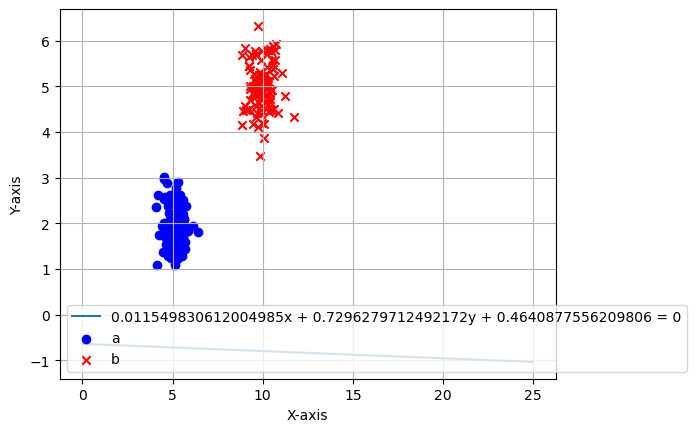

[0.46408776 0.01154983 0.72962797]


In [129]:
x = np.linspace(0, 25, 10)
a = p1.W[1]
b = p1.W[2]
c = p1.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(aX1, aX2, c='b', label='a', marker='o')
plt.scatter(bX1, bX2, c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p1.W)

Errors this epoch:68
Errors this epoch:27
Errors this epoch:24
Errors this epoch:15
Errors this epoch:6
Errors this epoch:3
Errors this epoch:3
Errors this epoch:0


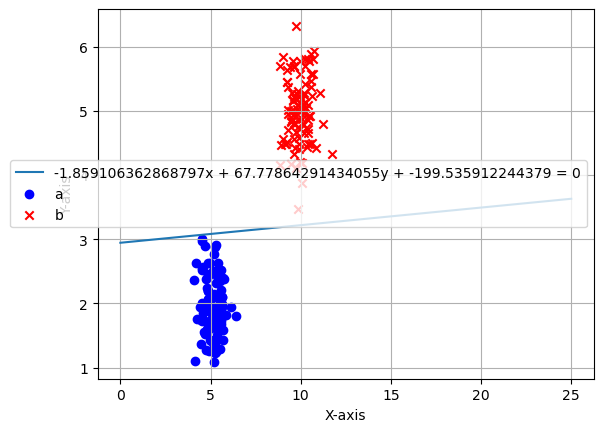

[-199.53591224   -1.85910636   67.77864291]


In [130]:
while (p1.fit_one_epoch(X_train, y_train) == False):
    pass


x = np.linspace(0, 25, 10)
a = p1.W[1]
b = p1.W[2]
c = p1.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(aX1, aX2, c='b', label='a', marker='o')
plt.scatter(bX1, bX2, c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p1.W)

------------